# 01-02 Working with multiple stocks

In [1]:
import pandas as pd

In [2]:
# specify a set of dates with dates as index
# this helps align stock data and orders it by trading date
start_date = '2010-01-22'
end_date = '2010-01-26'
dates = pd.date_range(start_date, end_date)
df1 = pd.DataFrame(index=dates)

In [3]:
# assume there exists a column named "Date" in SPY.csv 
# na_values specifies what should be interpreted as NaN 
# usecols specify which columns to use 
dfSPY = pd.read_csv("data/SPY.csv", index_col="Date", parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
dfSPY.head()

,Adj Close
Date,
2012-09-12,144.39
2012-09-11,143.91
2012-09-10,143.51
2012-09-07,144.33
2012-09-06,143.77


In [4]:
# typical left join OR do df1=df1.join(dfSPY,how='inner')
df2 = df1.join(dfSPY) # we want prices for above dates
df2 = df2.dropna() # we want to drop dates that don't have a close
df2

,Adj Close
2010-01-22,104.34
2010-01-25,104.87
2010-01-26,104.43


In [5]:
# read multiple stock adj close, and display days when SPY traded
def get_data(symbols, dates):
    if "SPY" not in symbols:
        symbols.insert(0, "SPY")
    dfRet = pd.DataFrame(index=dates)
    for s in symbols:
        dfTemp = pd.read_csv("data/{0}.csv".format(s), index_col="Date", parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        dfTemp = dfTemp.rename(columns={'Adj Close':s})
        dfRet = dfRet.join(dfTemp)
        if s == "SPY":
            dfRet = dfRet.dropna(subset=["SPY"])
    return dfRet

get_data(['AAPL', 'IBM'], dates)

,SPY,AAPL,IBM
2010-01-22,104.34,196.90,119.61
2010-01-25,104.87,202.20,120.20
2010-01-26,104.43,205.06,119.85


In [7]:
# created helper function in DataHelper to GetPriceHistory(symbols, start_date, end_date)
from DataHelper import DataHelper
df3 =DataHelper.GetPriceHistory(['AAPL', 'IBM'], '2010-01-22', '2010-01-26')
df3

,SPY,AAPL,IBM
2010-01-22,104.34,196.90,119.61
2010-01-25,104.87,202.20,120.20
2010-01-26,104.43,205.06,119.85


In [12]:
# slicing data frames
df3.ix['2010-01-22':'2010-01-25', ['AAPL','IBM']]

,AAPL,IBM
2010-01-22,196.9,119.61
2010-01-25,202.2,120.20


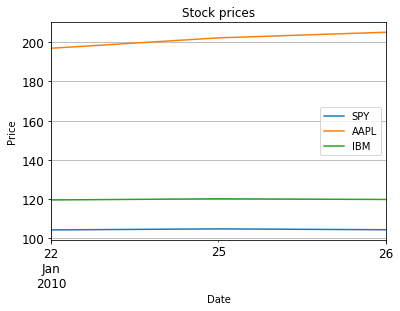

In [14]:
# problems with plotting
import matplotlib.pyplot as plt 
def plot_data(df, title="Stock prices"): 
    """Plot stock prices with a custom title and meaningful axis labels.""" 
    ax = df.plot(title=title, fontsize=12, grid=True) 
    ax.set_xlabel("Date") 
    ax.set_ylabel("Price") 
    plt.show() 

plot_data(df3)

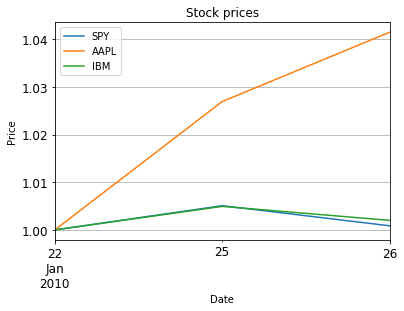

In [16]:
# normalize the data
def normalize_data(df):
    return df / df.ix[0,:]
plot_data(normalize_data(df3))